##### Анализ поведения пользователей в приложении spotify. Датасет: https://www.kaggle.com/datasets/meeraajayakumar/spotify-user-behavior-dataset

In [1]:
import pandas as pd

music = pd.read_excel('Spotify_data.xlsx')
music.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


Визуализируем жанровое предпочтения пользователей в зависимости от возраста

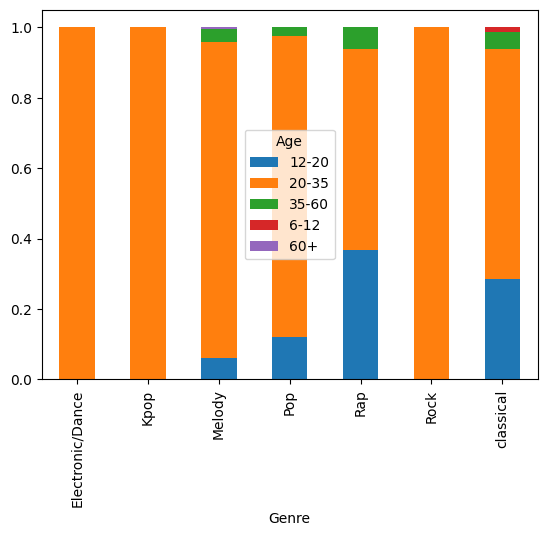

In [21]:
g_a = pd.crosstab(music['fav_music_genre'], music['Age']).drop(['All', 'trending songs random', 'Classical & melody, dance', 'Old songs'])
g_a_norm = g_a.div(g_a.sum(axis='columns'), axis='index')
g_a_norm.plot.bar(stacked=True, xlabel="Genre");

По этому графику уже можно сказать, что пользователи возраста 20-35 - преобладающая группа в spotify,
Rock и Kpop слушали лишь пользователи 20-35, соотношение пользователей слушающих Rap и соотношение пользователей слушающих classical,
что удивительно, почти одинаковое

Теперь определим любимый жанр самой многочисленной группы:

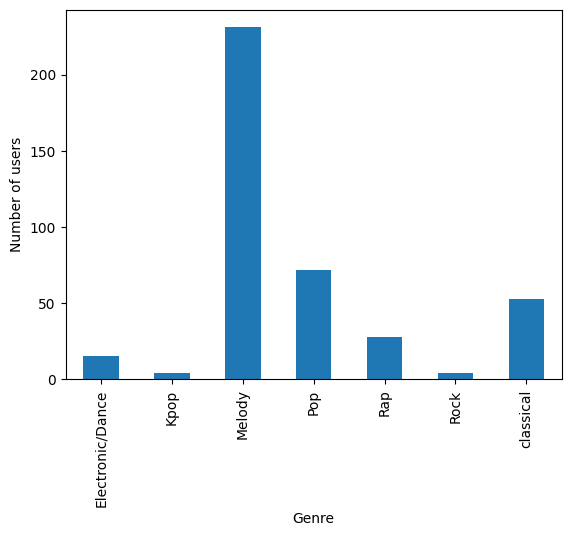

In [22]:
g_a['20-35'].plot.bar(ylabel='Number of users', xlabel='Genre');

Вывод: любимый жанр самой преобладающей группы(20-35) - это Melody

Теперь сравним кто более удовлетворён системой рекомендаций Spotify: мужчины или женщины?

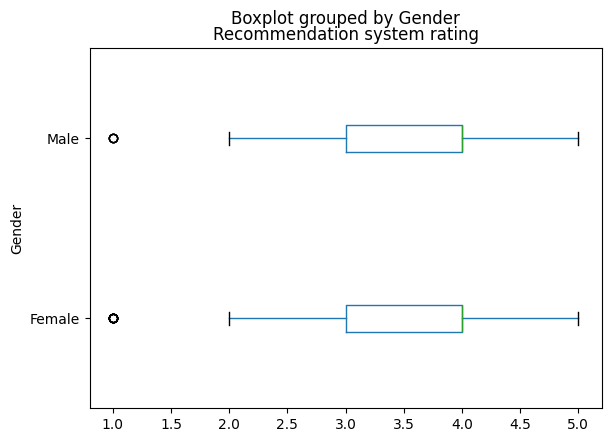

In [23]:
import matplotlib.pyplot as plt

music = music[(music['Gender'] == 'Male') | (music['Gender'] == 'Female')]
music.boxplot(column=['music_recc_rating'], by='Gender', grid=False, vert=False)
plt.title('Recommendation system rating');

Вывод: оценки мужчин и женщин полностью совпадают.

Теперь визуализируем как распределены пользователи в зависимости от подписки

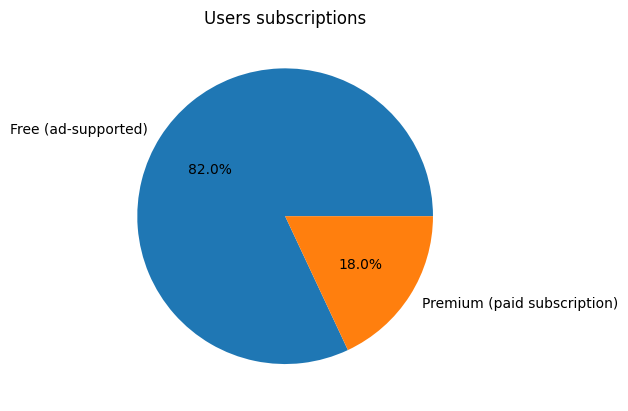

In [24]:
subs = music['spotify_subscription_plan'].value_counts()
subs.plot(kind='pie', autopct='%1.1f%%')
plt.title('Users subscriptions')
plt.ylabel('');

Вывод: платной подпиской пользуется всего лишь одна пятая всех пользователей.